In [77]:
# 데이터 처리 라이브러리
import pandas as pd
import numpy as np

# 머신러닝 라이브러리
from sklearn import tree, ensemble



In [78]:
from sklearn import svm, neighbors

In [79]:
import matplotlib.pyplot
%matplotlib inline
import seaborn as sns

In [80]:
from sklearn.tree import DecisionTreeClassifier


In [81]:
#데이터불러오기
csData = pd.read_csv("../dataset/customer.csv")

In [82]:
csData.label.drop_duplicates()

0     normal
1    diamond
4        vip
Name: label, dtype: object

In [83]:
labelMap = {"normal":1,"diamond":2,"vip":3}

In [84]:
csData["label_no"] = csData.label.map(labelMap)

<AxesSubplot:xlabel='label_no', ylabel='count'>

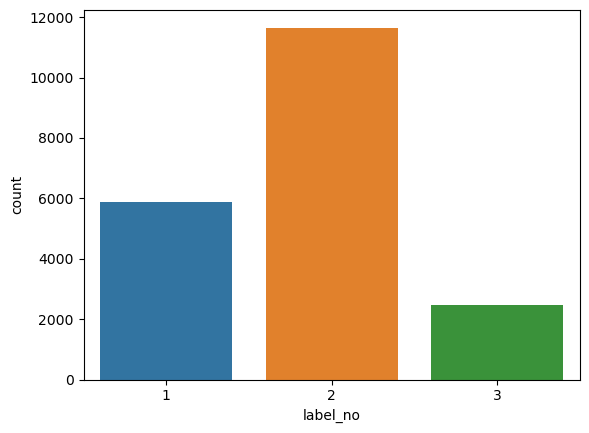

In [85]:
sns.countplot(data=csData, x="label_no")

In [86]:
csData

,balance,stock,label,label_no
0,30000000,22500000,normal,1
1,280000000,48000000,diamond,2
2,300000000,40666666,diamond,2
3,54000000,28000000,normal,1
4,768000000,32000000,vip,3
...,...,...,...,...
19995,628000000,44666666,diamond,2
19996,276000000,20000000,normal,1
19997,652000000,41333333,diamond,2
19998,676000000,45333333,diamond,2


##1.타입통합/숫자형 컬럼 변경

In [87]:
csData.dtypes

balance      int64
stock        int64
label       object
label_no     int64
dtype: object

##2.특정선정

In [88]:
csTypeMap = {"normal":1,"diamond":2,"vip":3}

In [89]:
csData["LABEL_MAP"] = csData.label.map(csTypeMap)

In [90]:
corrDf = csData.corr()

In [91]:
STDCORR = 0.5

In [92]:
features =list( corrDf.loc[(abs(corrDf.LABEL_MAP) > STDCORR) &
                (abs(corrDf.LABEL_MAP)!=1)].index)

In [93]:
features


['balance', 'stock']

In [94]:
label = ["label"]

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
trainingDataFeatures,\
testDataFeatures,\
trainingDataLabel,\
testDataLabel = train_test_split(csData.loc[:,features],
                                csData.loc[:,label],
                                test_size=0.3, random_state=5)

In [97]:
print(trainingDataFeatures.shape)
print(testDataFeatures.shape)
print(trainingDataLabel.shape)
print(testDataLabel.shape)

(14000, 2)
(6000, 2)
(14000, 1)
(6000, 1)


##모델선언./학습

In [101]:
scmModel = svm.SVC( C=1)
treeModel tree.DecisionTreeClassifier(random_state=10)
rfModel = ensemble.RandomForestClassifier(random_state=5)
knnModel = neighbors.KNeighborsClassifier(n_neighbors=3)

In [ ]:
svmModelFit = svmModel.fit(X=trainingDataFeatures, y=trainingDataLabel)
treeModelFit = treeModel.fit(X=trainingDataFeatures, y=trainingDataLabel)
rfModelFit = rfModel.fit(X=trainingDataFeatures, y=trainingDataLabel)
knnModelFit = knnModel.fit(X=trainingDataFeatures, y=trainingDataLabel)

##4.예측

In [ ]:
svmPredict = svmModelFit.predict(testDataFeatures)
dtPredict = dtModelFit.predict(testDataFeatures)
rfPredict = rfModelFit.predict(testDataFeatures)
knnPredict = knnModelFit.predict(testDataFeatures)

##5.데이터정리

In [ ]:
testDataLabel["SVM_PREDICT"] = svmPredict
testDataLabel["DT_PREDICT"] = dtPredict
testDataLabel["RF_PREDICT"] = rfPredict
testDataLabel["KNN_PREDICT"] = knnPredict

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
SVMACCUARCY = classification_report(y_true = testDataLabel.label,
                    y_pred=testDataLabel.SVM_PREDICT)
dtACCUARCY = classification_report(y_true = testDataLabel.label,
                    y_pred=testDataLabel.DT_PREDICT)
rfACCUARCY = classification_report(y_true = testDataLabel.label,
                    y_pred=testDataLabel.RF_PREDICT)
knnACCUARCY = classification_report(y_true = testDataLabel.label,
                    y_pred=testDataLabel.KNN_PREDICT)

In [ ]:
pd.DataFrame( [[SVMACCUARCY], dtACCUARCY, rfACCUARCY,knnACCUARCY]
            columns=["SVM","DT","RF","KNN"])

In [ ]:
testDataLabel

In [ ]:
#test

In [ ]:
features

In [ ]:
inBlance = 300000
inStock = 3000000
testData = pd.DataFrame([inBlance, inBlance])

In [ ]:
treeModeFit.predict(testData)